In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={"figure.figsize":(20,10)})

### Currently, the event codes are being read as numbers and leading zeros are being removed.

In [3]:
janjune = pd.read_csv("jan_to_june_2021_vaevents.csv")

C:\Users\Aba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (15,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
junedec = pd.read_csv("june_to_dec_2020_vaevents.csv")

C:\Users\Aba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (15,25,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
vaevents_df = pd.concat([janjune,junedec],axis=0)

In [6]:
current_events_df = vaevents_df.query("(Year == 2020 | Year == 2021) & MonthYear != 202001 & MonthYear != 202002 & MonthYear != 202003 & MonthYear != 202004 & MonthYear != 202005")

In [39]:
current_events_df.query("")

,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
5,1019,962220518,20210101,202101,2021,2021.0027,GOV,PRESIDENT,NaN,NaN,...,2,"Virginia, United States",US,USVA,NaN,37.768,-78.2057,VA,20210101000000,https://newsadvance.com/news/local/virginia-su...


In [ ]:
current_events_df

In [45]:
current_events_df.ActionGeo_FullName.value_counts().head(50)

Virginia, United States                                 243929
Richmond, Virginia, United States                        29327
Charlottesville, Virginia, United States                 12488
Norfolk, Virginia, United States                          9747
Fairfax County, Virginia, United States                   7442
Fauquier County, Virginia, United States                  4512
Loudoun County, Virginia, United States                   4289
Hampton, Virginia, United States                          3699
Prince William County, Virginia, United States            3440
Lynchburg, Virginia, United States                        3270
Henrico, Virginia, United States                          3117
Williamsburg, Virginia, United States                     2833
Liberty University, Virginia, United States               2422
Fredericksburg, Virginia, United States                   2380
Shenandoah, Virginia, United States                       2213
Danville, Virginia, United States                      

In [23]:
current_events_df.GLOBALEVENTID.value_counts().head(20)

962219740    2
970652232    2
970653596    2
970652587    2
970652558    2
970652557    2
970652552    2
970652546    2
970652524    2
970652231    2
970654196    2
970652169    2
970652156    2
970652138    2
970650100    2
970650099    2
970650098    2
970650095    2
970653604    2
970654266    2
Name: GLOBALEVENTID, dtype: int64

In [172]:
top20events = list(current_events_df.groupby('EventCode').agg({'GLOBALEVENTID':'count'}).sort_values('GLOBALEVENTID',ascending=False).head(20).reset_index()['EventCode'])

In [173]:
top20_df = current_events_df[current_events_df['EventCode'].apply(lambda x: x in top20events)]

In [174]:
top20_heatmap = top20_df[['MonthYear','EventCode']].groupby(['MonthYear','EventCode']).size().unstack(level='MonthYear').fillna(0)

In [175]:
#top20_heatmap = top20_heatmap[list(top20_heatmap.columns[6:12])+list(top20_heatmap.columns[0:6])] #    top20_heatmap.iloc[:,6:12].concat(top20_heatmap.iloc[:,0:6],axis=1)

<AxesSubplot:xlabel='MonthYear', ylabel='EventCode'>

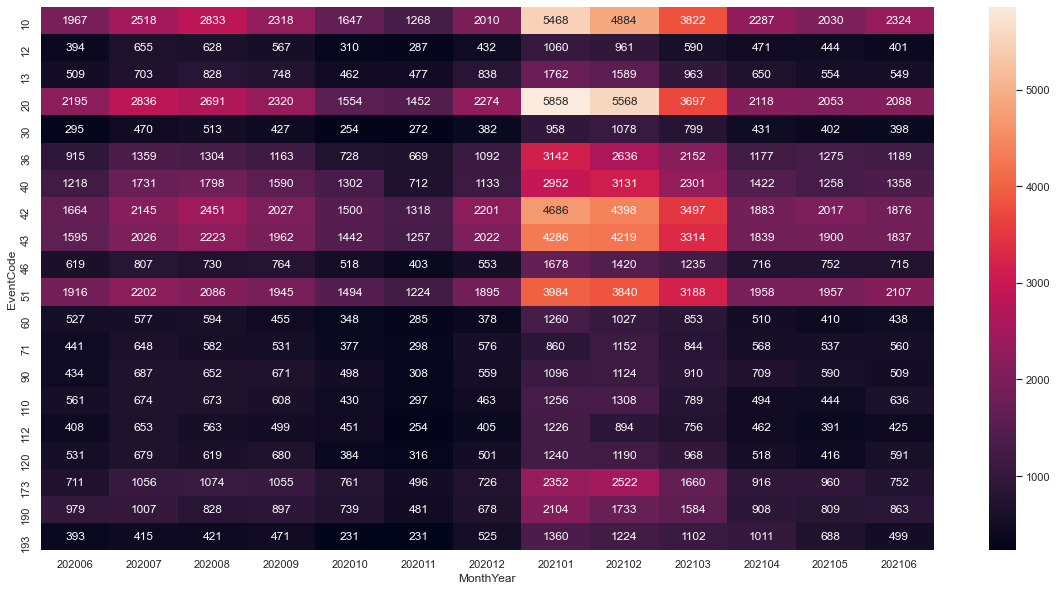

In [176]:
sns.heatmap(top20_heatmap,annot=True,fmt='g')

In [136]:
top20_df["ActionGeo_Long"].unique()

array([-78.2057, -78.4767, -77.5528, ..., -76.4232, -77.7705, -78.2639])

In [137]:
top20_df["ActionGeo_Lat"].unique()

array([37.768 , 38.0293, 38.8109, ..., 36.6043, 38.3868, 37.8515])

In [ ]:
#https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

In [120]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt# import street map
street_map = gpd.read_file("cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp")

In [126]:
# designate coordinate system
crs = {'init':'epsg:4326'} # zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(top20_df["ActionGeo_Long"], top20_df["ActionGeo_Lat"])]# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(top20_df,
 crs = crs,
 geometry = geometry)

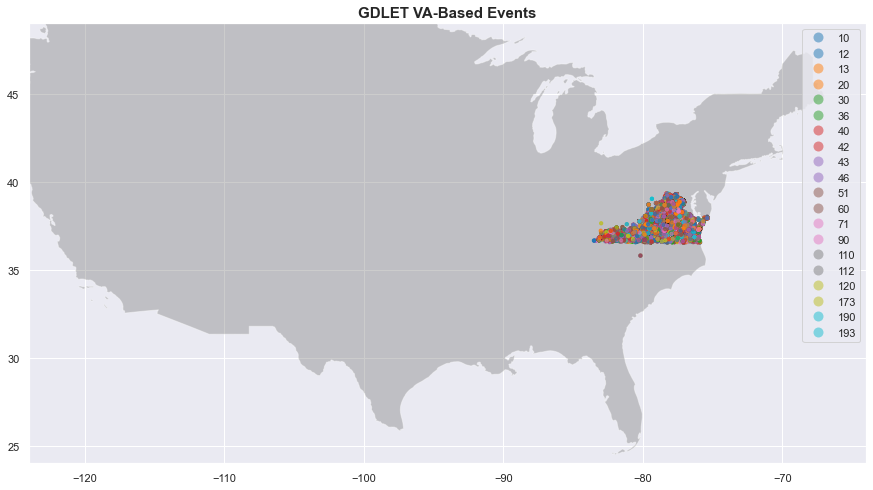

In [141]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color="grey")# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column="EventCode",ax=ax,alpha=0.5, legend=True,markersize=10)# add title to graph
plt.title("GDLET VA-Based Events", fontsize=15,fontweight="bold")# set latitiude and longitude boundaries for map display
plt.xlim(-124,-64)
plt.ylim(24,49)# show map
plt.show()